In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
from google.colab import files
import io
archivo=files.upload()
data=pd.read_csv(io.BytesIO(archivo['HCV-Egy-Data9.csv']),delimiter=",")

Saving HCV-Egy-Data9.csv to HCV-Egy-Data9.csv


In [ ]:
data.head(10)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1
5,58,2,22,2,2,2,1,2,2,1,...,73,114,29,1157452,1086852,5,5,5,4,4
6,42,2,26,1,1,2,2,2,2,2,...,84,80,28,325694,1034008,275095,214566,635157,12,4
7,48,2,30,1,1,2,2,1,1,2,...,96,53,39,641129,72050,787295,370605,506296,12,3
8,44,1,23,1,1,2,2,2,1,2,...,122,39,45,591441,757361,5,371090,203042,5,2
9,45,1,30,2,1,2,2,1,1,2,...,125,43,30,1151206,230488,267320,275295,555516,4,2


In [ ]:
print(data.groupby("Baselinehistological staging").size())

Baselinehistological staging
1    336
2    332
3    355
4    362
dtype: int64


In [ ]:
data.isnull().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

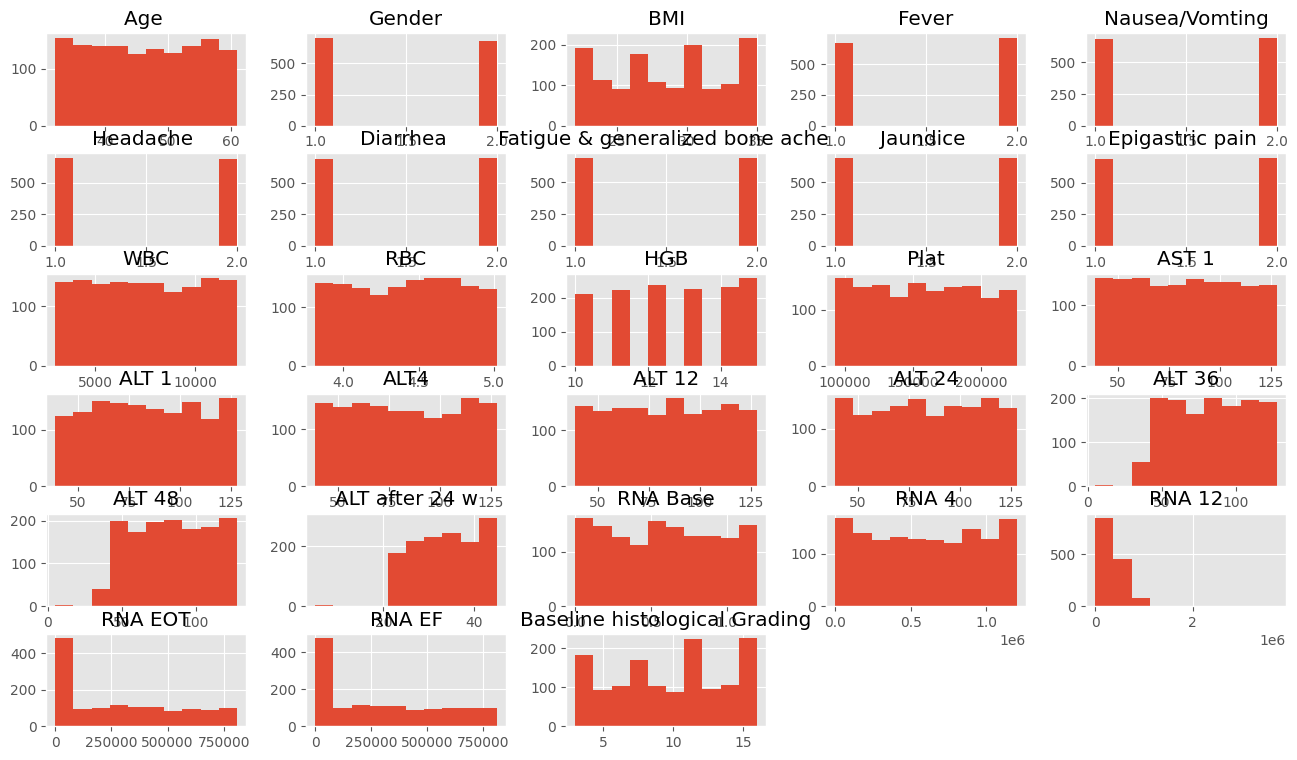

In [ ]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data.drop(["Baselinehistological staging"],axis=1).hist()
plt.show()

In [ ]:
caracteristicas=list(data)
print(caracteristicas)
"""
caracteristicasEliminar=["PassengerId","Name","Ticket","Cabin","Embarked","Survived","Fare"]
for c in caracteristicasEliminar:
  caracteristicas.remove(c)
print(caracteristicas)
"""
X=data.drop(["Baselinehistological staging","Age ","BMI","WBC","RBC","HGB","Plat","AST 1", "ALT 1", "ALT4", "ALT 12", "ALT 24", "ALT 36", "ALT 48", "ALT after 24 w", "RNA Base", "RNA 4", "RNA 12", "RNA EOT", "RNA EF", "Baseline histological Grading"],axis=1)
y=data["Baselinehistological staging"]
caracteristicas=list(X)
print(caracteristicas)
print(X)

['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1', 'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w', 'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF', 'Baseline histological Grading', 'Baselinehistological staging']
['Gender', 'Fever', 'Nausea/Vomting', 'Headache ', 'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ', 'Epigastric pain ']
      Gender  Fever  Nausea/Vomting  Headache   Diarrhea   \
0          1      2               1          1          1   
1          1      1               2          2          1   
2          1      2               2          2          2   
3          2      1               2          1          2   
4          1      1               1          2          1   
...      ...    ...             ...        ...        ...   
1380       1      1               2          2          2   
1

In [ ]:
XTrain,XTest,yTrain,yTest=train_test_split(X,y,test_size=0.2,random_state=5)



Implementación Árbol de Decisión

In [ ]:
#max_depth=3
modelo=DecisionTreeClassifier(max_depth=2)
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))

Train Accuracy  0.29422382671480146
Test Accuracy  0.2924187725631769


[[15  0 16 36]
 [16  0 13 35]
 [13  0 20 31]
 [21  0 15 46]]


<Axes: >

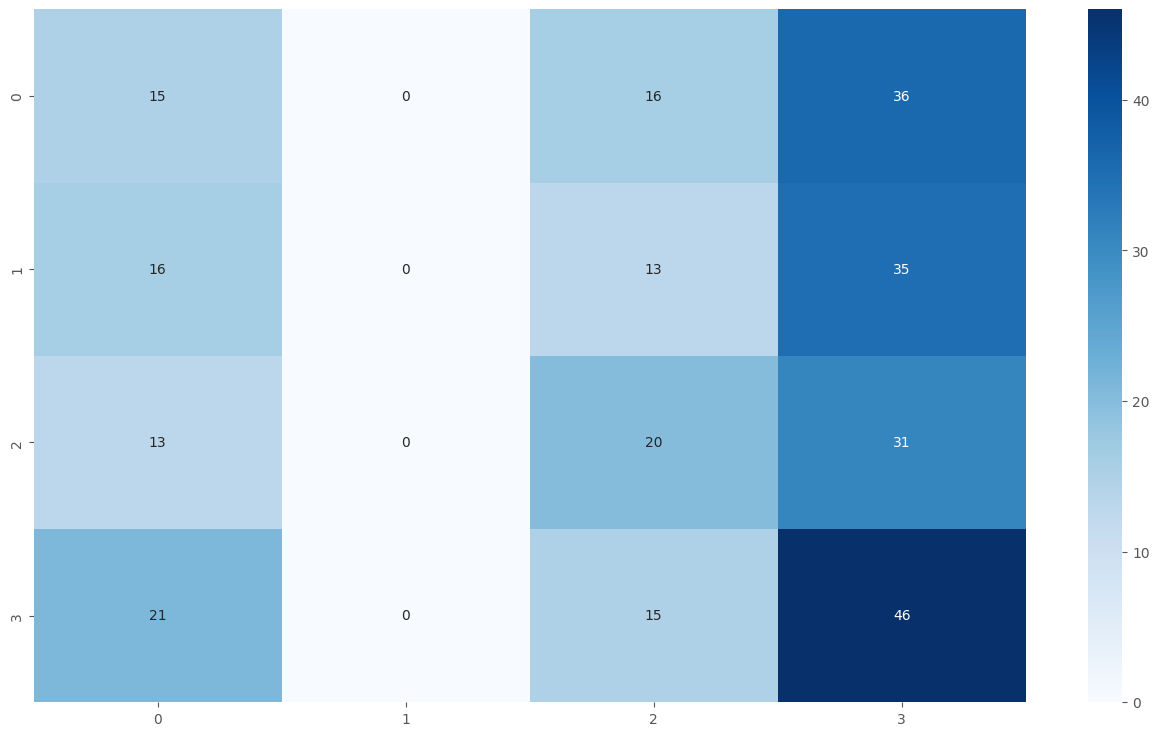

In [ ]:
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

Accuracy

In [ ]:
print("Accruracy=",metrics.accuracy_score(yTest,yPredict))
print(matriz)

Accruracy= 0.2924187725631769
[[15  0 16 36]
 [16  0 13 35]
 [13  0 20 31]
 [21  0 15 46]]


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
precision_recall_fscore_support(yTest,yPredict, average=None)
target_names = ["fibrosis portal","pocos septos", "muchos septos", "cirrosis "]
print(classification_report(yTest,yPredict, target_names=target_names))

                 precision    recall  f1-score   support

fibrosis portal       0.23      0.22      0.23        67
   pocos septos       0.00      0.00      0.00        64
  muchos septos       0.31      0.31      0.31        64
      cirrosis        0.31      0.56      0.40        82

       accuracy                           0.29       277
      macro avg       0.21      0.27      0.23       277
   weighted avg       0.22      0.29      0.25       277



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
export_graphviz(modelo,out_file="arbol.dot",class_names=target_names,feature_names=caracteristicas,impurity=False,filled=True)

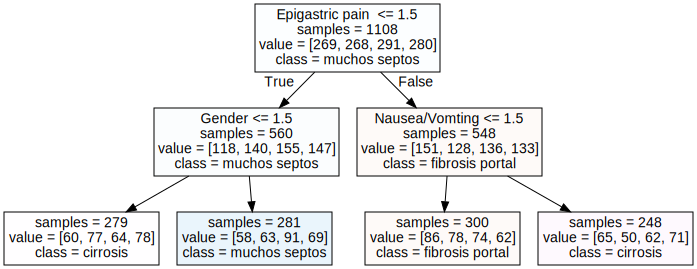

In [ ]:
with open("arbol.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

8


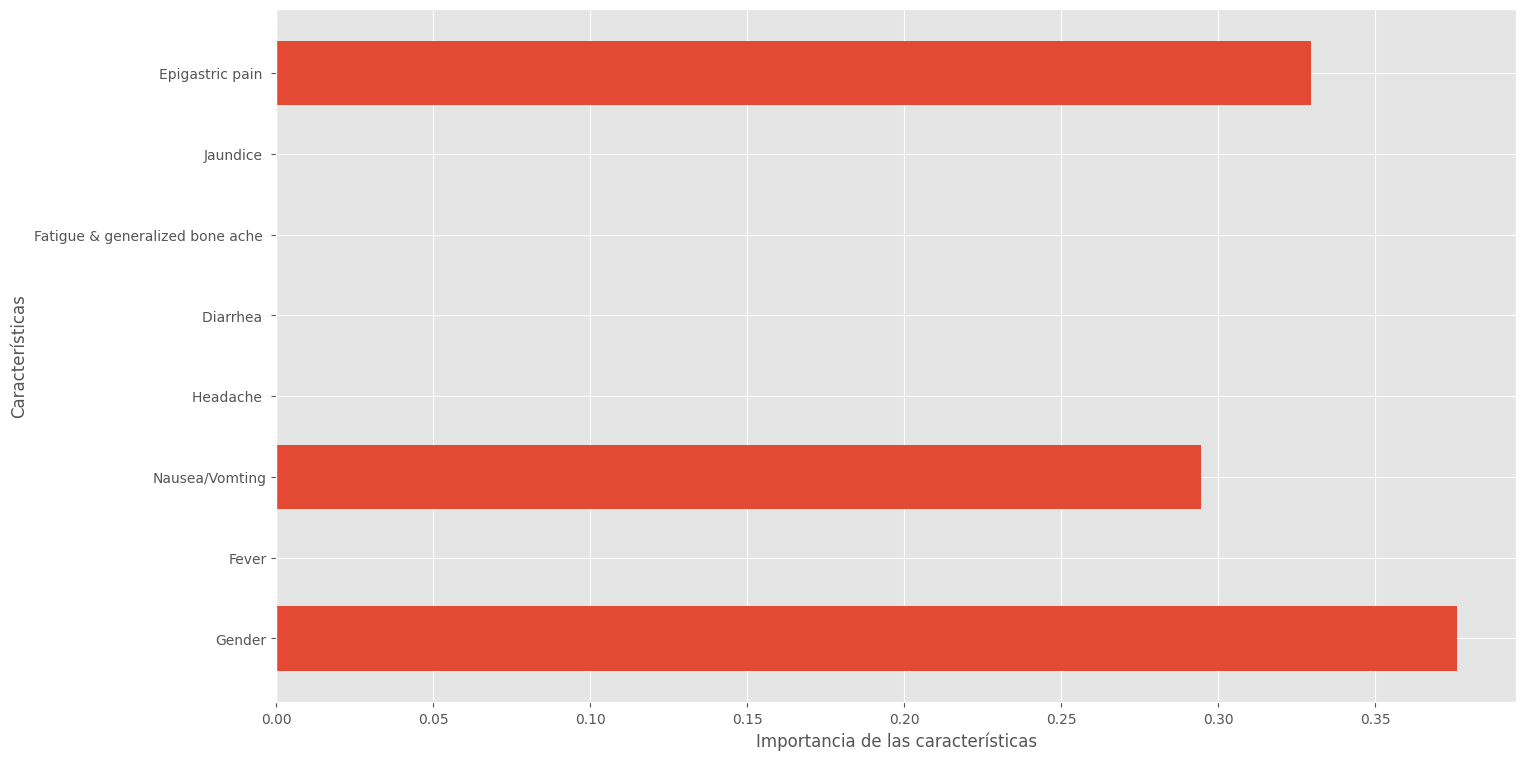

In [ ]:
numeroCaracteristicas=X.shape[1]
print(numeroCaracteristicas)
plt.barh(range(numeroCaracteristicas),modelo.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

Validación Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelo, X, y, cv=5,scoring='f1')
print(scores)
print(scores.mean())

[nan nan nan nan nan]
nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
  